In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat
from ex8fun import *

In [2]:
data = loadmat('data/ex8data1.mat')
x = data['X']
x.shape

(307, 2)

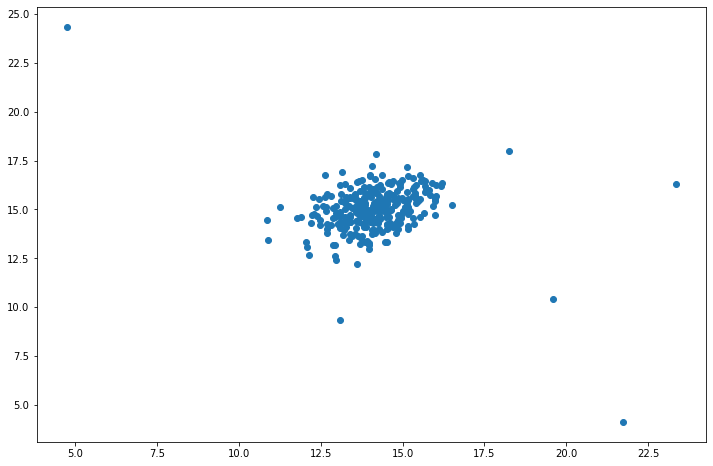

In [3]:
fig ,ax = plt.subplots(figsize = (12,8))

ax.scatter(x[:,0],x[:,1])
plt.show()

In [4]:
mu,sigma = estimate_gaussin(x)
mu,sigma

(array([14.11222578, 14.99771051]), array([1.83263141, 1.70974533]))

In [5]:
xval = data['Xval']
yval = data['yval']
xval.shape,yval.shape

((307, 2), (307, 1))

In [6]:
from scipy import stats

dist = stats.norm(mu[0],sigma[0])

dist.pdf(15)

0.1935875044615038

In [7]:
dist.pdf(x[:,0])[0:50]

array([0.183842  , 0.20221694, 0.21746136, 0.19778763, 0.20858956,
       0.21652359, 0.16991291, 0.15123542, 0.1163989 , 0.1594734 ,
       0.21716057, 0.21760472, 0.20141857, 0.20157497, 0.21711385,
       0.21758775, 0.21695576, 0.2138258 , 0.21057069, 0.1173018 ,
       0.20765108, 0.21717452, 0.19510663, 0.21702152, 0.17429399,
       0.15413455, 0.21000109, 0.20223586, 0.21031898, 0.21313426,
       0.16158946, 0.2170794 , 0.17825767, 0.17414633, 0.1264951 ,
       0.19723662, 0.14538809, 0.21766361, 0.21191386, 0.21729442,
       0.21238912, 0.18799417, 0.21259798, 0.21752767, 0.20616968,
       0.21520366, 0.1280081 , 0.21768113, 0.21539967, 0.16913173])

In [8]:
p = np.zeros((x.shape[0],x.shape[1]))
p[:,0] = stats.norm(mu[0],sigma[0]).pdf(x[:,0])
p[:,1] = stats.norm(mu[1],sigma[1]).pdf(x[:,1])

p.shape

(307, 2)

In [15]:
pval = np.zeros((x.shape[0],x.shape[1]))
pval[:,0] = stats.norm(mu[0],sigma[0]).pdf(xval[:,0])
pval[:,1] = stats.norm(mu[1],sigma[1]).pdf(xval[:,1])

pval.shape

(307, 2)

In [16]:
epsilon, f1 = select_threshold(pval, yval)
epsilon, f1

c:\Users\14217\Desktop\machine_learnings\code\ex8-anomaly detection and recommendation\ex8fun.py:26: RuntimeWarning: invalid value encountered in double_scalars
  precision = tp / ( tp + fp)


(0.009566706005956842, 0.7142857142857143)

In [17]:
# indexes of the values considered to be outliers
outliers = np.where(p < epsilon)
outliers

(array([300, 301, 301, 303, 303, 304, 306, 306], dtype=int64),
 array([1, 0, 1, 0, 1, 0, 0, 1], dtype=int64))

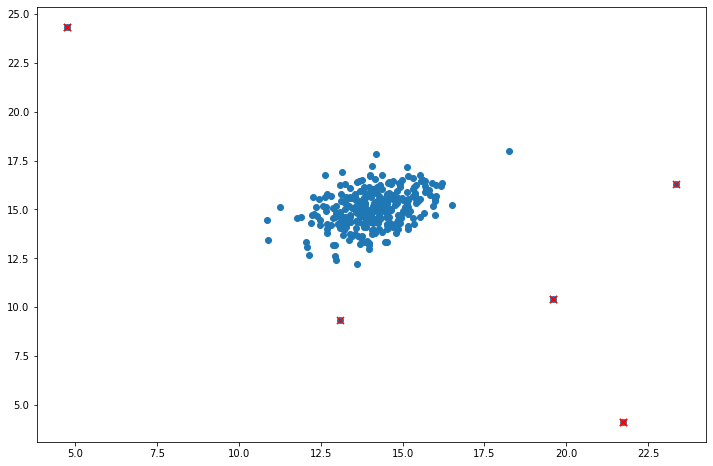

In [21]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x[:,0], x[:,1])
ax.scatter(x[outliers[0],0], x[outliers[0],1], s=50, color='r', marker='x')
plt.show()

In [22]:
data = loadmat('data/ex8_movies.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Dec  1 17:19:26 2011',
 '__version__': '1.0',
 '__globals__': [],
 'Y': array([[5, 4, 0, ..., 5, 0, 0],
        [3, 0, 0, ..., 0, 0, 5],
        [4, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'R': array([[1, 1, 0, ..., 1, 0, 0],
        [1, 0, 0, ..., 0, 0, 1],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [23]:
y = data['Y']
r = data['R']
y.shape,r.shape

((1682, 943), (1682, 943))

In [24]:
y[1,np.where(r[1,:] == 1)[0]].mean()

3.2061068702290076

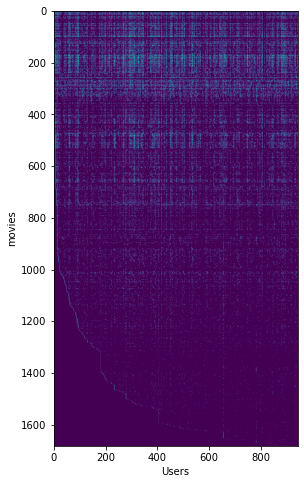

In [26]:
fig,ax = plt.subplots(figsize = (12,8))

ax.imshow(y)
ax.set_xlabel("Users")
ax.set_ylabel("movies")
# fig.tight_layout()
plt.show()